In [1]:
import numpy as np
import pandas as pd
pd.set_option("max_columns", None)

In [2]:
df = pd.read_csv("Resale_Data_with_travel_duration.csv")
df.head()

,resale_date,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Postal,Latitude,Longitude,max_floor_lvl,height_index,Distance_to_MRT,station_name,travel_time
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 04 months,232000.0,560406,1.362005,103.85388,12,4.0,1.0,Ang Mo Kio,26 mins
1,2017-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 01 month,235000.0,560406,1.362005,103.85388,12,4.0,1.0,Ang Mo Kio,26 mins
2,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,60 years 02 months,202000.0,560406,1.362005,103.85388,12,1.0,1.0,Ang Mo Kio,26 mins
3,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,60 years 02 months,210000.0,560406,1.362005,103.85388,12,1.0,1.0,Ang Mo Kio,26 mins
4,2018-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,60 years 01 month,220000.0,560406,1.362005,103.85388,12,3.0,1.0,Ang Mo Kio,26 mins


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134393 entries, 0 to 134392
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   resale_date          134393 non-null  object 
 1   town                 134393 non-null  object 
 2   flat_type            134393 non-null  object 
 3   block                134393 non-null  object 
 4   street_name          134393 non-null  object 
 5   floor_area_sqm       134393 non-null  float64
 6   flat_model           134393 non-null  object 
 7   lease_commence_date  134393 non-null  int64  
 8   remaining_lease      134393 non-null  object 
 9   resale_price         134393 non-null  float64
 10  Postal               134393 non-null  int64  
 11  Latitude             134393 non-null  float64
 12  Longitude            134393 non-null  float64
 13  max_floor_lvl        134393 non-null  int64  
 14  height_index         134393 non-null  float64
 15  Distance_to_MRT  

---

### Quick EDA

In [ ]:
# Drop:
# Town - Station Name would be more granular
# Block and street name - Station name would be our highest level of granularity in this model
# Lease commencement date - Remaining lease is a better metric since it tells the age of the flat at the time of resale
# Postal, latitude and longitude - No longer needed

# Retain:
# Flat type and flat model - While floor area is the most obvious metric for flat size, these variables could still be relevant


In [4]:
df = df.drop(columns = ["town", "block", "street_name", "lease_commence_date", "Postal", "Latitude", "Longitude"])
df.head()

,resale_date,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,max_floor_lvl,height_index,Distance_to_MRT,station_name,travel_time
0,2017-01,2 ROOM,44.0,Improved,61 years 04 months,232000.0,12,4.0,1.0,Ang Mo Kio,26 mins
1,2017-05,2 ROOM,44.0,Improved,61 years 01 month,235000.0,12,4.0,1.0,Ang Mo Kio,26 mins
2,2018-03,2 ROOM,44.0,Improved,60 years 02 months,202000.0,12,1.0,1.0,Ang Mo Kio,26 mins
3,2018-03,2 ROOM,44.0,Improved,60 years 02 months,210000.0,12,1.0,1.0,Ang Mo Kio,26 mins
4,2018-05,2 ROOM,44.0,Improved,60 years 01 month,220000.0,12,3.0,1.0,Ang Mo Kio,26 mins


In [5]:
df["resale_date"] = df["resale_date"] + "-01"
df["resale_date"] = pd.to_datetime(df["resale_date"], format = '%Y-%m-%d')
df.head()

,resale_date,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,max_floor_lvl,height_index,Distance_to_MRT,station_name,travel_time
0,2017-01-01,2 ROOM,44.0,Improved,61 years 04 months,232000.0,12,4.0,1.0,Ang Mo Kio,26 mins
1,2017-05-01,2 ROOM,44.0,Improved,61 years 01 month,235000.0,12,4.0,1.0,Ang Mo Kio,26 mins
2,2018-03-01,2 ROOM,44.0,Improved,60 years 02 months,202000.0,12,1.0,1.0,Ang Mo Kio,26 mins
3,2018-03-01,2 ROOM,44.0,Improved,60 years 02 months,210000.0,12,1.0,1.0,Ang Mo Kio,26 mins
4,2018-05-01,2 ROOM,44.0,Improved,60 years 01 month,220000.0,12,3.0,1.0,Ang Mo Kio,26 mins


In [6]:
# Convert remaining_lease to months only
df["remaining_lease"] = df["remaining_lease"].astype(pd.StringDtype())
df["remaining_lease"] = df["remaining_lease"].str.split().str[0].astype(int) * 12 + df["remaining_lease"].str.split().str[-2].astype(int)
df.head()

,resale_date,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,max_floor_lvl,height_index,Distance_to_MRT,station_name,travel_time
0,2017-01-01,2 ROOM,44.0,Improved,736,232000.0,12,4.0,1.0,Ang Mo Kio,26 mins
1,2017-05-01,2 ROOM,44.0,Improved,733,235000.0,12,4.0,1.0,Ang Mo Kio,26 mins
2,2018-03-01,2 ROOM,44.0,Improved,722,202000.0,12,1.0,1.0,Ang Mo Kio,26 mins
3,2018-03-01,2 ROOM,44.0,Improved,722,210000.0,12,1.0,1.0,Ang Mo Kio,26 mins
4,2018-05-01,2 ROOM,44.0,Improved,721,220000.0,12,3.0,1.0,Ang Mo Kio,26 mins


In [7]:
df["travel_time"] = df["travel_time"].astype(pd.StringDtype())
df["travel_time"] = df["travel_time"].str.split().str[0].astype(int)
df.head()

,resale_date,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,max_floor_lvl,height_index,Distance_to_MRT,station_name,travel_time
0,2017-01-01,2 ROOM,44.0,Improved,736,232000.0,12,4.0,1.0,Ang Mo Kio,26
1,2017-05-01,2 ROOM,44.0,Improved,733,235000.0,12,4.0,1.0,Ang Mo Kio,26
2,2018-03-01,2 ROOM,44.0,Improved,722,202000.0,12,1.0,1.0,Ang Mo Kio,26
3,2018-03-01,2 ROOM,44.0,Improved,722,210000.0,12,1.0,1.0,Ang Mo Kio,26
4,2018-05-01,2 ROOM,44.0,Improved,721,220000.0,12,3.0,1.0,Ang Mo Kio,26


In [8]:
# Shifting dependent variable resale_date to the last column and categoral features to the front
cols = ["resale_date", "flat_type", "flat_model", "station_name", "floor_area_sqm", "max_floor_lvl", "height_index", 
        "Distance_to_MRT", "travel_time", "remaining_lease", "resale_price"]
df = df[cols]
df.head()

,resale_date,flat_type,flat_model,station_name,floor_area_sqm,max_floor_lvl,height_index,Distance_to_MRT,travel_time,remaining_lease,resale_price
0,2017-01-01,2 ROOM,Improved,Ang Mo Kio,44.0,12,4.0,1.0,26,736,232000.0
1,2017-05-01,2 ROOM,Improved,Ang Mo Kio,44.0,12,4.0,1.0,26,733,235000.0
2,2018-03-01,2 ROOM,Improved,Ang Mo Kio,44.0,12,1.0,1.0,26,722,202000.0
3,2018-03-01,2 ROOM,Improved,Ang Mo Kio,44.0,12,1.0,1.0,26,722,210000.0
4,2018-05-01,2 ROOM,Improved,Ang Mo Kio,44.0,12,3.0,1.0,26,721,220000.0


In [9]:
#df.to_csv("final_dataset_prepared_for_model.csv", index=False)
df = pd.read_csv("final_dataset_prepared_for_model.csv")
df["resale_date"] = pd.to_datetime(df["resale_date"], format = '%Y-%m-%d')

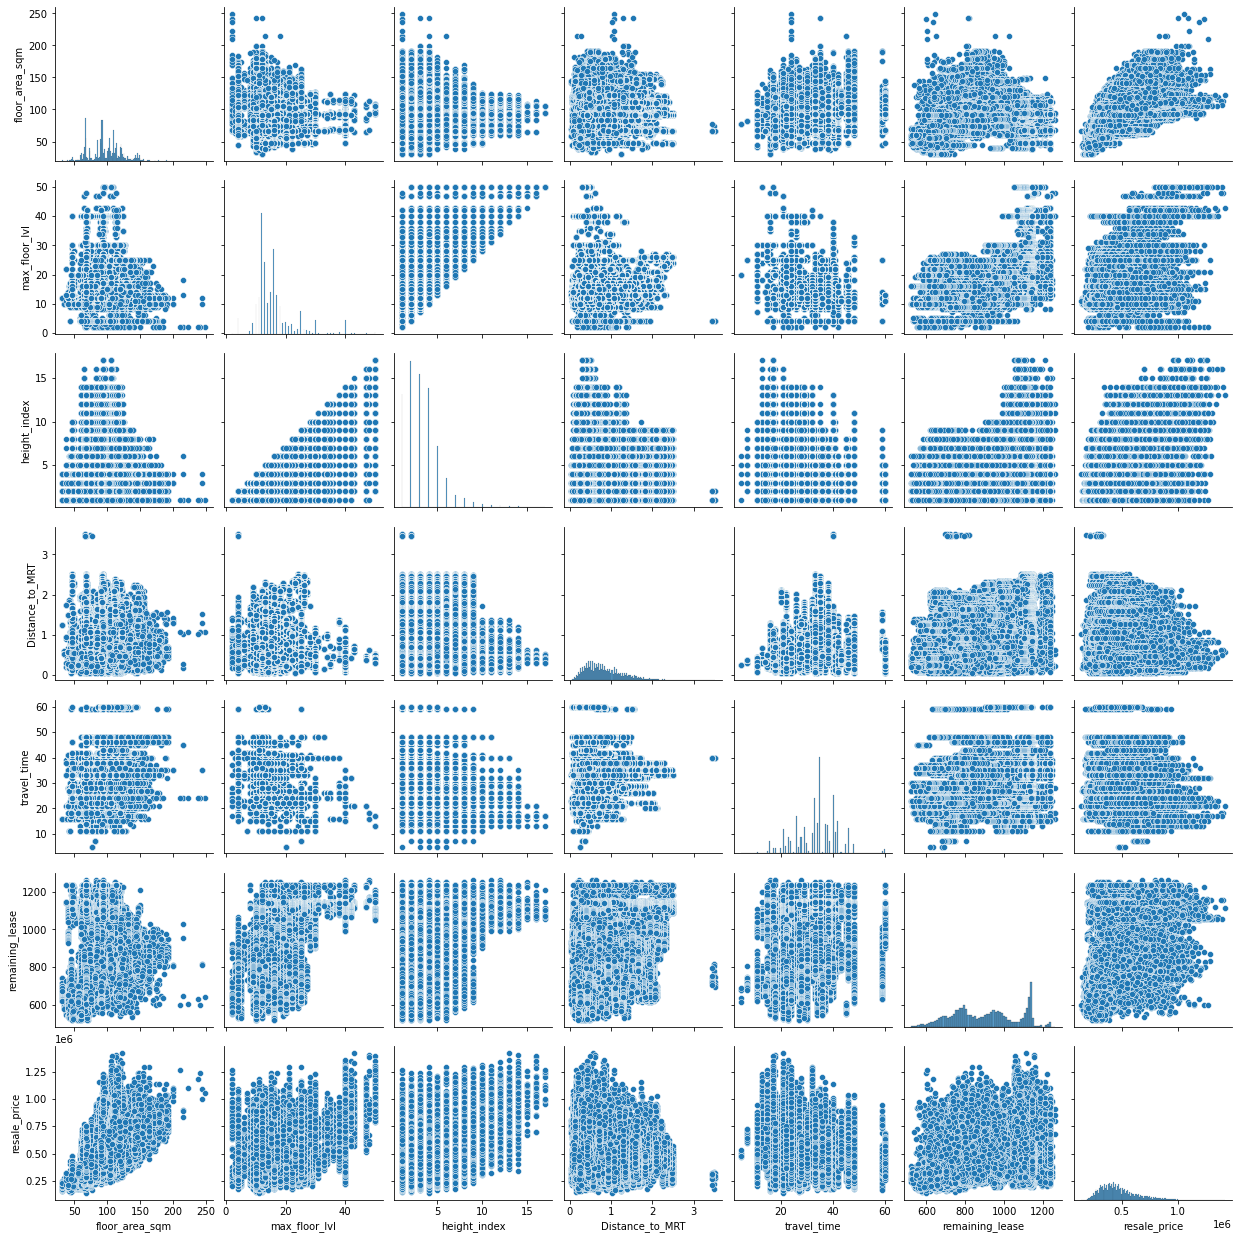

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

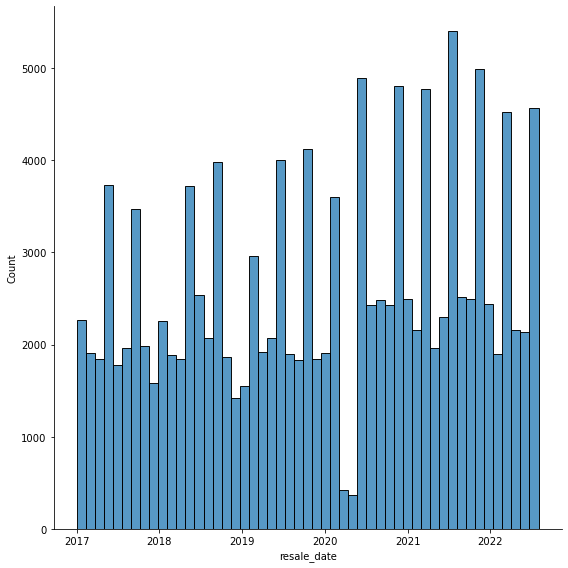

In [11]:
sns.displot(df, x = df.resale_date, height = 8)

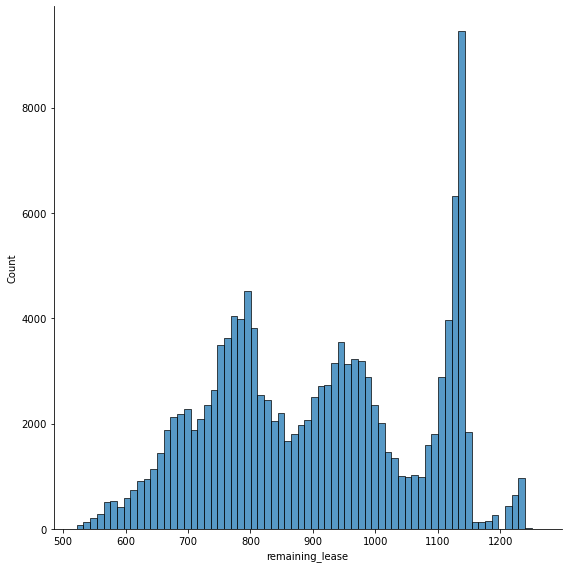

In [12]:
#Observations:
#COVID-19 severely impacted the market for 2 months and likely had an effect on resale prices as well.
#Hence, we would be having separate models for pre- and post-COVID-19.
#Spikes in transactions can be observed every 3 months apart and is likely due to to the way HDB's resale unit releases
#keys to new BTO owners.
#It is probable that some owners are rushing to sell their flats upon reaching the Minimum Occupation Period (MOP).

sns.displot(df, x = df.remaining_lease, height = 8)

In [13]:
#As seen above, there is a significant number of owners selling their flats upon reaching the MOP.
df.remaining_lease.mode()

0    1139
dtype: int64

In [14]:
# A heatmap can also be obtained if the dataset contains lat long coordinates.

dftest = pd.read_csv("Resale-Coordinates-Cleaned.csv")
dftest.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Address,Postal,Latitude,Longitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,560406,1.362005,103.853880
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,560108,1.370966,103.838202
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,560602,1.380709,103.835368
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,560465,1.366201,103.857201
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,560601,1.381041,103.835132


In [15]:
dftest = dftest[["month", "Latitude", "Longitude", "resale_price"]]
dftest = dftest[dftest.month > "2019-11"]   # Post-COVID

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

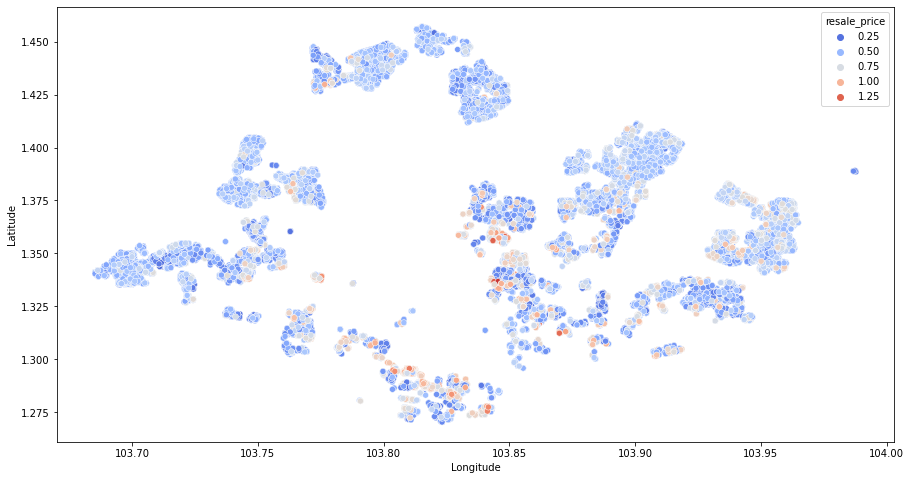

In [16]:
plt.figure(figsize = (15,8))
sns.scatterplot(x= dftest.Longitude, y = dftest.Latitude, hue = dftest.resale_price, palette = "coolwarm")

In [ ]:
# Observations:
# High resale prices occur more in the central ans southern parts of Singapore.
# These areas have prices at both extremes of the scale due to Singapore's redevelopment strategy.

---

### Splitting Pre- and Post- COVID Datasets

In [17]:
dataset1 = df[df.resale_date < "2019-06-01"].drop(columns = "resale_date")
dataset1.to_csv("dataset_pre_covid.csv", index=False)
dataset2 = df[df.resale_date >= "2019-11-01"].drop(columns = "resale_date")
dataset2.to_csv("dataset_post_covid.csv", index=False)

In [18]:
dataset2.head()

,flat_type,flat_model,station_name,floor_area_sqm,max_floor_lvl,height_index,Distance_to_MRT,travel_time,remaining_lease,resale_price
7,2 ROOM,Improved,Ang Mo Kio,44.0,12,3.0,1.00,26,697,203000.0
8,2 ROOM,Improved,Ang Mo Kio,44.0,12,3.0,1.00,26,697,200000.0
9,2 ROOM,Improved,Ang Mo Kio,44.0,12,2.0,1.00,26,681,233000.0
10,2 ROOM,Improved,Ang Mo Kio,44.0,12,2.0,1.00,26,676,235000.0
18,4 ROOM,New Generation,Ang Mo Kio,83.0,12,2.0,1.27,26,693,280000.0


### Correlation Analysis

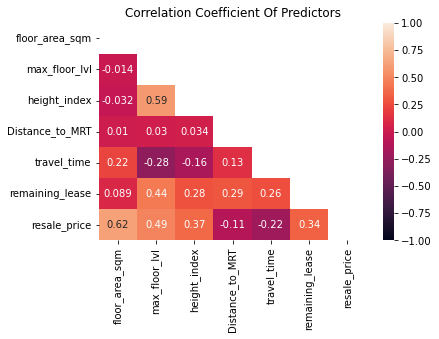

In [19]:
# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(dataset2.corr(), dtype=bool))

# Generate heatmap
sns.heatmap(dataset2.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
# Nothing stands out in terms of collinearity of numerical variables.

# Multiple Linear Regression

In [ ]:
# One problem with the dataset is the large number of unique station names that makes it difficult to fit in a pipeline
# with one-hot encoding and cross-validation, since you could have resulting different features in different sets of data.
# Hence, the dataset has to be one-hot encoded before splitting into train and test data to retain all
# unique elements in categorical features.

In [20]:
X = dataset2.loc[:, "flat_type":"remaining_lease"].values
y = dataset2.loc[:, "resale_price"].values

In [21]:
# Perform OHE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1,2])], remainder='passthrough')
X = ct.fit_transform(X)
print(X[0])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 44.0 12 3.0
 1.0 26 697]


In [22]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = np.concatenate((X_train[:,:-6], sc_X.fit_transform(X_train[:,-6:])), axis = 1)
print(X_train[0])

[0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 -1.2865666549118935 -0.03470202974889921 0.8433263919607462
 -0.23370638680970124 1.06937247637738 1.2167393551669066]


In [24]:
X_test = np.concatenate((X_test[:,:-6], sc_X.transform(X_test[:,-6:])), axis = 1)
print(X_test[0])

[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.2622244198436956 -0.7455897879669605 -0.6346448612570718
 -0.021246688598138976 0.8141809248127543 -1.0433168237134496]


In [26]:
# Call and fit model

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [27]:
# Obtain predicted values
y_pred = regr.predict(X_test)

In [30]:
# Test set scores

from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, max_error, mean_squared_error

R2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_R2 = 1 - ((1-R2) * (n-1)/(n-p-1))
print(("Adjusted R2: %.4f") % adj_R2)
print(("R2: %.4f" % R2))

print("MAPE:", "{:.4f}".format(mean_absolute_percentage_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Max Error:", max_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred) ** (1/2))

Adjusted R2: 0.8566
R2: 0.8579
MAPE: 0.1094
MAE: 49994.69349120433
Max Error: 322856.0
RMSE:  63312.68423004984


In [31]:
# Coefficients of numerical features
print(regr.intercept_)
feat = dataset2.columns[-7:-1]
coef = regr.coef_[-6:]
df2 = pd.DataFrame(np.array([coef]), columns = feat)
df2

-3.2192475326441492e+16


,floor_area_sqm,max_floor_lvl,height_index,Distance_to_MRT,travel_time,remaining_lease
0,86208.0,18048.0,24240.0,-23504.0,5.187512e+15,63630.0


In [32]:
# Coefficients of categorical features
df3 = pd.DataFrame(np.array([regr.coef_[:-6]]), columns = ct.transformers_[0][1].get_feature_names().tolist())
df3

,x0_1 ROOM,x0_2 ROOM,x0_3 ROOM,x0_4 ROOM,x0_5 ROOM,x0_EXECUTIVE,x0_MULTI-GENERATION,x1_2-room,x1_3Gen,x1_Adjoined flat,x1_Apartment,x1_DBSS,x1_Improved,x1_Improved-Maisonette,x1_Maisonette,x1_Model A,x1_Model A-Maisonette,x1_Model A2,x1_Multi Generation,x1_New Generation,x1_Premium Apartment,x1_Premium Apartment Loft,x1_Premium Maisonette,x1_Simplified,x1_Standard,x1_Terrace,x1_Type S1,x1_Type S2,x2_Admiralty,x2_Aljunied,x2_Ang Mo Kio,x2_Bartley,x2_Beauty World,x2_Bedok North,x2_Bedok Reservoir,x2_Bencoolen,x2_Bendemeer,x2_Bishan,x2_Boon Keng,x2_Boon Lay,x2_Botanic Gardens,x2_Braddell,x2_Bras Basah,x2_Buangkok,x2_Bugis,x2_Bukit Batok,x2_Bukit Gombak,x2_Bukit Panjang,x2_Buona Vista,x2_Caldecott,x2_Canberra,x2_Cashew,x2_Changi Airport,x2_Chinatown,x2_Chinese Garden,x2_Choa Chu Kang,x2_Clementi,x2_Commonwealth,x2_Dakota,x2_Dover,x2_Esplanade,x2_Eunos,x2_Farrer Park,x2_Farrer Road,x2_Geylang Bahru,x2_HarbourFront,x2_Hillview,x2_Holland Village,x2_Hougang,x2_Jalan Besar,x2_Jurong East,x2_Kaki Bukit,x2_Kallang,x2_Kembangan,x2_Khatib,x2_King Albert Park,x2_Kovan,x2_Labrador Park,x2_Lakeside,x2_Lavender,x2_Little India,x2_Lorong Chuan,x2_MacPherson,x2_Marsiling,x2_Marymount,x2_Mattar,x2_Mountbatten,x2_Newton,x2_Nicoll Highway,x2_Novena,x2_Outram Park,x2_Pasir Panjang,x2_Pasir Ris,x2_Paya Lebar,x2_Pioneer,x2_Potong Pasir,x2_Punggol,x2_Queenstown,x2_Redhill,x2_Rochor,x2_Sembawang,x2_Sengkang,x2_Serangoon,x2_Simei,x2_Tai Seng,x2_Tampines,x2_Tampines East,x2_Tan Kah Kee,x2_Tanah Merah,x2_Tanjong Pagar,x2_Telok Blangah,x2_Tiong Bahru,x2_Toa Payoh,x2_Ubi,x2_Upper Changi,x2_Woodlands,x2_Woodlands North,x2_Woodlands South,x2_Woodleigh,x2_Yew Tee,x2_Yio Chu Kang,x2_Yishun,x2_one-north
0,1.155750e+16,1.155750e+16,1.155750e+16,1.155750e+16,1.155750e+16,1.155750e+16,-2.804879e+17,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,3.031406e+17,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,1.109524e+16,3.992346e+15,2.053996e+16,1.458282e+16,1.061139e+16,1.061139e+16,9.287583e+15,7.301869e+15,2.451139e+16,1.723044e+16,1.656853e+16,1.590663e+16,5.978060e+15,1.325901e+16,1.789234e+16,2.715901e+16,9.949487e+15,2.451139e+16,5.316155e+15,4.654250e+15,5.316155e+15,1.590663e+16,1.061139e+16,6.639964e+15,6.639964e+15,5.316155e+15,1.855425e+16,8.625678e+15,1.344728e+15,1.325901e+16,1.656853e+16,1.590663e+16,1.458282e+16,2.848282e+16,1.855425e+16,1.656853e+16,7.301869e+15,1.656853e+16,1.723044e+16,7.963773e+15,7.963773e+15,9.287583e+15,1.987806e+16,1.259711e+16,9.949487e+15,2.186377e+16,1.723044e+16,9.949487e+15,9.287583e+15,9.949487e+15,5.316155e+15,7.301869e+15,2.451139e+16,1.723044e+16,7.301869e+15,1.392091e+16,2.091841e+13,8.625678e+15,1.325901e+16,1.524472e+16,2.252567e+16,2.053996e+16,1.987806e+16,2.053996e+16,7.963773e+15,1.061139e+16,1.855425e+16,3.992346e+15,1.392091e+16,6.639964e+15,1.789234e+16,1.987806e+16,1.987806e+16,4.654250e+15,8.625678e+15,9.287583e+15,1.193520e+16,1.193520e+16,1.259711e+16,5.316155e+15,1.193520e+16,1.458282e+16,2.318758e+16,1.193520e+16,2.120186e+16,1.789234e+16,1.127330e+16,3.330441e+15,1.344728e+15,-7.260032e+15,-7.921937e+15,1.325901e+16,2.006632e+15,1.458282e+16,8.625678e+15,8.625678e+15


In [ ]:
# Observations:
# It looks like coefficients are messed up because of dummy variable trap.
# Dropping first column during one-hot encoding should fix this.
# Also to note that multi-generation appearing in both x0 and x1 categories resulting in nullification of both.
# x1_2-room and x1_3Gen (equivalent to x0 multi-gen) also need to be removed.
# Travel time feature should be evaluated separately from station name since they have a 1-to-1 relationship,
# and it will be dropped from this study.

In [33]:
X = dataset2.drop('travel_time', axis = 1)
X = X.loc[:, "flat_type":"remaining_lease"].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first', sparse=False), [0,1,2])], remainder='passthrough')
X = ct.fit_transform(X)

In [34]:
# Deleting x0_MULTI-GENERATION and x1_3Gen columns; OHE dropped x1_2-room.
X = np.delete(X, [5, 6], axis = 1)

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Feature Scaling
sc_X = StandardScaler()
X_train = np.concatenate((X_train[:,:-5], sc_X.fit_transform(X_train[:,-5:])), axis = 1)
X_test = np.concatenate((X_test[:,:-5], sc_X.transform(X_test[:,-5:])), axis = 1)

In [36]:
# Call and fit model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [39]:
# Obtain predicted values
y_pred = regr.predict(X_test)

# Test set scores
R2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_R2 = 1 - ((1-R2) * (n-1)/(n-p-1))
print(("Adjusted R2: %.4f") % adj_R2)
print(("R2: %.4f" % R2))

print("MAPE:", "{:.4f}".format(mean_absolute_percentage_error(y_test, y_pred)))
print("MAE:", "{:.0f}".format(mean_absolute_error(y_test, y_pred)))
print("Max Error:", "{:.0f}".format(max_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(mean_squared_error(y_test, y_pred) ** (1/2)))

Adjusted R2: 0.8567
R2: 0.8579
MAPE: 0.1094
MAE: 49998
Max Error: 323179
RMSE:  63313


In [40]:
# Coefficients of Numerical Features
print(regr.intercept_)
feat = dataset2.drop('travel_time', axis = 1).columns[-6:-1]
coef = regr.coef_[-5:]
df2 = pd.DataFrame(np.array([coef]), columns = feat)
df2

339246.65655551234


,floor_area_sqm,max_floor_lvl,height_index,Distance_to_MRT,remaining_lease
0,86139.429877,17986.741328,24258.867358,-23534.687063,63637.876563


In [41]:
ct.transformers_[0][1].get_feature_names().tolist()

['x0_2 ROOM',
 'x0_3 ROOM',
 'x0_4 ROOM',
 'x0_5 ROOM',
 'x0_EXECUTIVE',
 'x0_MULTI-GENERATION',
 'x1_3Gen',
 'x1_Adjoined flat',
 'x1_Apartment',
 'x1_DBSS',
 'x1_Improved',
 'x1_Improved-Maisonette',
 'x1_Maisonette',
 'x1_Model A',
 'x1_Model A-Maisonette',
 'x1_Model A2',
 'x1_Multi Generation',
 'x1_New Generation',
 'x1_Premium Apartment',
 'x1_Premium Apartment Loft',
 'x1_Premium Maisonette',
 'x1_Simplified',
 'x1_Standard',
 'x1_Terrace',
 'x1_Type S1',
 'x1_Type S2',
 'x2_Aljunied',
 'x2_Ang Mo Kio',
 'x2_Bartley',
 'x2_Beauty World',
 'x2_Bedok North',
 'x2_Bedok Reservoir',
 'x2_Bencoolen',
 'x2_Bendemeer',
 'x2_Bishan',
 'x2_Boon Keng',
 'x2_Boon Lay',
 'x2_Botanic Gardens',
 'x2_Braddell',
 'x2_Bras Basah',
 'x2_Buangkok',
 'x2_Bugis',
 'x2_Bukit Batok',
 'x2_Bukit Gombak',
 'x2_Bukit Panjang',
 'x2_Buona Vista',
 'x2_Caldecott',
 'x2_Canberra',
 'x2_Cashew',
 'x2_Changi Airport',
 'x2_Chinatown',
 'x2_Chinese Garden',
 'x2_Choa Chu Kang',
 'x2_Clementi',
 'x2_Commonweal

In [42]:
# Coefficients of categorical features
columns = ct.transformers_[0][1].get_feature_names().tolist()
columns = np.delete(columns, [5,6])    # Delete 'x0_MULTI-GENERATION', 'x1_3Gen'
df3 = pd.DataFrame(np.array([regr.coef_[:-5]]), columns = columns)
df3

,x0_2 ROOM,x0_3 ROOM,x0_4 ROOM,x0_5 ROOM,x0_EXECUTIVE,x1_Adjoined flat,x1_Apartment,x1_DBSS,x1_Improved,x1_Improved-Maisonette,x1_Maisonette,x1_Model A,x1_Model A-Maisonette,x1_Model A2,x1_Multi Generation,x1_New Generation,x1_Premium Apartment,x1_Premium Apartment Loft,x1_Premium Maisonette,x1_Simplified,x1_Standard,x1_Terrace,x1_Type S1,x1_Type S2,x2_Aljunied,x2_Ang Mo Kio,x2_Bartley,x2_Beauty World,x2_Bedok North,x2_Bedok Reservoir,x2_Bencoolen,x2_Bendemeer,x2_Bishan,x2_Boon Keng,x2_Boon Lay,x2_Botanic Gardens,x2_Braddell,x2_Bras Basah,x2_Buangkok,x2_Bugis,x2_Bukit Batok,x2_Bukit Gombak,x2_Bukit Panjang,x2_Buona Vista,x2_Caldecott,x2_Canberra,x2_Cashew,x2_Changi Airport,x2_Chinatown,x2_Chinese Garden,x2_Choa Chu Kang,x2_Clementi,x2_Commonwealth,x2_Dakota,x2_Dover,x2_Esplanade,x2_Eunos,x2_Farrer Park,x2_Farrer Road,x2_Geylang Bahru,x2_HarbourFront,x2_Hillview,x2_Holland Village,x2_Hougang,x2_Jalan Besar,x2_Jurong East,x2_Kaki Bukit,x2_Kallang,x2_Kembangan,x2_Khatib,x2_King Albert Park,x2_Kovan,x2_Labrador Park,x2_Lakeside,x2_Lavender,x2_Little India,x2_Lorong Chuan,x2_MacPherson,x2_Marsiling,x2_Marymount,x2_Mattar,x2_Mountbatten,x2_Newton,x2_Nicoll Highway,x2_Novena,x2_Outram Park,x2_Pasir Panjang,x2_Pasir Ris,x2_Paya Lebar,x2_Pioneer,x2_Potong Pasir,x2_Punggol,x2_Queenstown,x2_Redhill,x2_Rochor,x2_Sembawang,x2_Sengkang,x2_Serangoon,x2_Simei,x2_Tai Seng,x2_Tampines,x2_Tampines East,x2_Tan Kah Kee,x2_Tanah Merah,x2_Tanjong Pagar,x2_Telok Blangah,x2_Tiong Bahru,x2_Toa Payoh,x2_Ubi,x2_Upper Changi,x2_Woodlands,x2_Woodlands North,x2_Woodlands South,x2_Woodleigh,x2_Yew Tee,x2_Yio Chu Kang,x2_Yishun,x2_one-north
0,17532.841508,43535.094529,67245.041279,103642.49653,97044.765721,18987.899307,9982.003608,60595.142116,-49228.218037,97121.858992,54271.650895,-37521.972773,52419.805124,-19559.209106,210230.989627,-30927.601611,-20557.978629,60049.758264,62237.060001,-17560.690834,-41202.34728,424950.796724,73143.332706,112728.944543,177608.702629,179370.378827,151845.97217,360824.110882,146370.109616,160314.176274,255721.291707,266043.381485,264925.400385,201153.1271,44157.315941,287242.971891,185488.9526,368615.04001,69400.485408,282038.130993,102031.334471,62391.880371,42294.347399,248301.199104,253881.898376,82903.419114,97247.64867,323235.401647,240497.315053,89729.57298,39680.650296,187285.270091,219288.175772,264829.467124,220700.61066,250944.259274,259723.530869,209480.744011,288771.857195,173297.561735,209776.065219,230790.410356,271012.407039,117630.913984,199263.245416,89792.388789,105601.14842,236282.556409,316340.974899,75536.710517,237097.949443,140004.539421,204969.175417,74012.442605,231578.177253,169700.311855,220182.542388,204141.888962,42900.585932,261386.018119,170119.545879,289622.557239,220229.235291,172833.411517,254972.211453,296667.178347,262681.558164,99659.869891,227267.201571,8882.833412,202405.7361,91701.316034,244975.376509,261736.917373,235200.387543,-14499.380939,54707.730682,215833.536115,127638.358864,161046.273479,147553.804008,109751.14625,372491.840197,165496.258792,305221.205224,230717.525735,280974.425289,221466.878677,106306.964266,121656.697418,38197.477366,44764.379971,12437.121843,145708.609099,-7421.163248,160172.508073,75489.134814,221796.264698


In [43]:
pd.options.display.max_rows = 120
df3.T

,0
x0_2 ROOM,17532.841508
x0_3 ROOM,43535.094529
x0_4 ROOM,67245.041279
x0_5 ROOM,103642.496530
x0_EXECUTIVE,97044.765721
x1_Adjoined flat,18987.899307
x1_Apartment,9982.003608
x1_DBSS,60595.142116
x1_Improved,-49228.218037
x1_Improved-Maisonette,97121.858992


In [ ]:
# Observations:
# Baseline price of any flat $339246 (from intercept).
# From scale of coefficients, it can be observed that station name is the main price deciding factor, and other variables
# slghtly tune the predicted price in upward or downward direction.

### Comparing Coefficients of Initial Model

<AxesSubplot:>

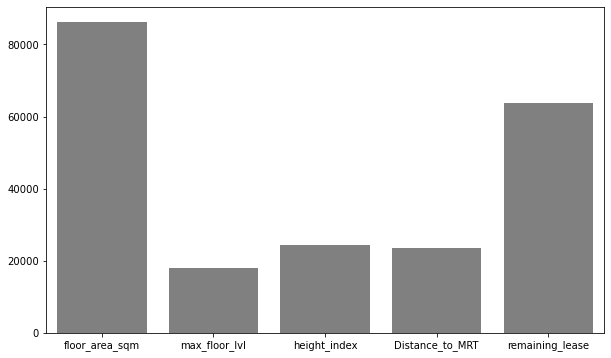

In [44]:
# Comparion of coefficients - numerical variables
plt.figure(figsize = (10, 6))
sns.barplot(data = abs(df2), color = 'grey')    # Take the absolute of distance to MRT for the sake of comparison.

In [45]:
# Comparion of coefficients - categoricall variables
df_flat_type = df3.loc[:, "x0_2 ROOM" : "x0_EXECUTIVE"]
df_flat_type

,x0_2 ROOM,x0_3 ROOM,x0_4 ROOM,x0_5 ROOM,x0_EXECUTIVE
0,17532.841508,43535.094529,67245.041279,103642.49653,97044.765721


<AxesSubplot:>

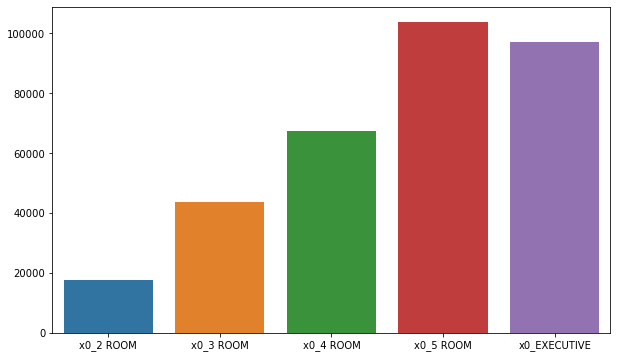

In [46]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df_flat_type)

In [ ]:
# Observation:
# Model puts 5-room coefficient ahead of executive but the floor_area coefficient being the highest for the numericals
# should see the average executive flat still edge out a 5-room flat.

In [47]:
df_flat_model = df3.loc[:, "x1_Adjoined flat" : "x1_Type S2"]
df_flat_model

,x1_Adjoined flat,x1_Apartment,x1_DBSS,x1_Improved,x1_Improved-Maisonette,x1_Maisonette,x1_Model A,x1_Model A-Maisonette,x1_Model A2,x1_Multi Generation,x1_New Generation,x1_Premium Apartment,x1_Premium Apartment Loft,x1_Premium Maisonette,x1_Simplified,x1_Standard,x1_Terrace,x1_Type S1,x1_Type S2
0,18987.899307,9982.003608,60595.142116,-49228.218037,97121.858992,54271.650895,-37521.972773,52419.805124,-19559.209106,210230.989627,-30927.601611,-20557.978629,60049.758264,62237.060001,-17560.690834,-41202.34728,424950.796724,73143.332706,112728.944543


In [48]:
df_flat_model.T

,0
x1_Adjoined flat,18987.899307
x1_Apartment,9982.003608
x1_DBSS,60595.142116
x1_Improved,-49228.218037
x1_Improved-Maisonette,97121.858992
x1_Maisonette,54271.650895
x1_Model A,-37521.972773
x1_Model A-Maisonette,52419.805124
x1_Model A2,-19559.209106
x1_Multi Generation,210230.989627


<AxesSubplot:>

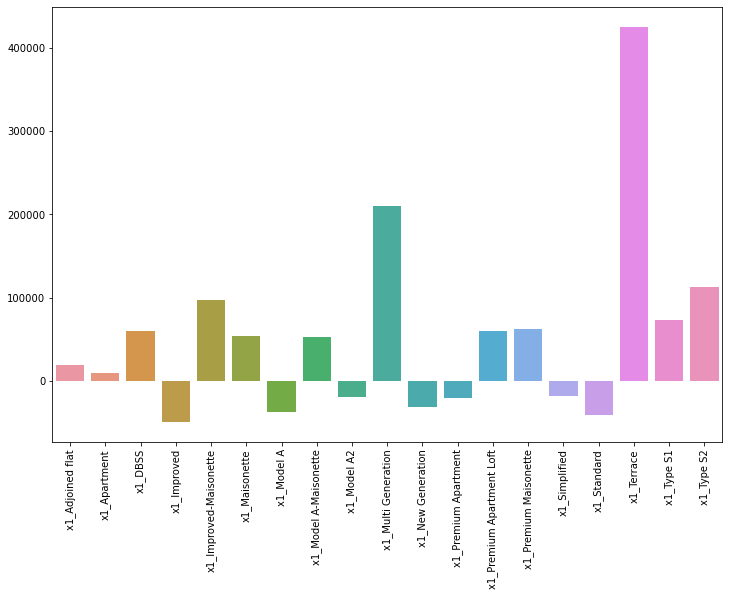

In [49]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df_flat_model)

In [50]:
df_station_name = df3.loc[:, "x2_Aljunied" : "x2_one-north"]
df_station_name

,x2_Aljunied,x2_Ang Mo Kio,x2_Bartley,x2_Beauty World,x2_Bedok North,x2_Bedok Reservoir,x2_Bencoolen,x2_Bendemeer,x2_Bishan,x2_Boon Keng,x2_Boon Lay,x2_Botanic Gardens,x2_Braddell,x2_Bras Basah,x2_Buangkok,x2_Bugis,x2_Bukit Batok,x2_Bukit Gombak,x2_Bukit Panjang,x2_Buona Vista,x2_Caldecott,x2_Canberra,x2_Cashew,x2_Changi Airport,x2_Chinatown,x2_Chinese Garden,x2_Choa Chu Kang,x2_Clementi,x2_Commonwealth,x2_Dakota,x2_Dover,x2_Esplanade,x2_Eunos,x2_Farrer Park,x2_Farrer Road,x2_Geylang Bahru,x2_HarbourFront,x2_Hillview,x2_Holland Village,x2_Hougang,x2_Jalan Besar,x2_Jurong East,x2_Kaki Bukit,x2_Kallang,x2_Kembangan,x2_Khatib,x2_King Albert Park,x2_Kovan,x2_Labrador Park,x2_Lakeside,x2_Lavender,x2_Little India,x2_Lorong Chuan,x2_MacPherson,x2_Marsiling,x2_Marymount,x2_Mattar,x2_Mountbatten,x2_Newton,x2_Nicoll Highway,x2_Novena,x2_Outram Park,x2_Pasir Panjang,x2_Pasir Ris,x2_Paya Lebar,x2_Pioneer,x2_Potong Pasir,x2_Punggol,x2_Queenstown,x2_Redhill,x2_Rochor,x2_Sembawang,x2_Sengkang,x2_Serangoon,x2_Simei,x2_Tai Seng,x2_Tampines,x2_Tampines East,x2_Tan Kah Kee,x2_Tanah Merah,x2_Tanjong Pagar,x2_Telok Blangah,x2_Tiong Bahru,x2_Toa Payoh,x2_Ubi,x2_Upper Changi,x2_Woodlands,x2_Woodlands North,x2_Woodlands South,x2_Woodleigh,x2_Yew Tee,x2_Yio Chu Kang,x2_Yishun,x2_one-north
0,177608.702629,179370.378827,151845.97217,360824.110882,146370.109616,160314.176274,255721.291707,266043.381485,264925.400385,201153.1271,44157.315941,287242.971891,185488.9526,368615.04001,69400.485408,282038.130993,102031.334471,62391.880371,42294.347399,248301.199104,253881.898376,82903.419114,97247.64867,323235.401647,240497.315053,89729.57298,39680.650296,187285.270091,219288.175772,264829.467124,220700.61066,250944.259274,259723.530869,209480.744011,288771.857195,173297.561735,209776.065219,230790.410356,271012.407039,117630.913984,199263.245416,89792.388789,105601.14842,236282.556409,316340.974899,75536.710517,237097.949443,140004.539421,204969.175417,74012.442605,231578.177253,169700.311855,220182.542388,204141.888962,42900.585932,261386.018119,170119.545879,289622.557239,220229.235291,172833.411517,254972.211453,296667.178347,262681.558164,99659.869891,227267.201571,8882.833412,202405.7361,91701.316034,244975.376509,261736.917373,235200.387543,-14499.380939,54707.730682,215833.536115,127638.358864,161046.273479,147553.804008,109751.14625,372491.840197,165496.258792,305221.205224,230717.525735,280974.425289,221466.878677,106306.964266,121656.697418,38197.477366,44764.379971,12437.121843,145708.609099,-7421.163248,160172.508073,75489.134814,221796.264698


<AxesSubplot:>

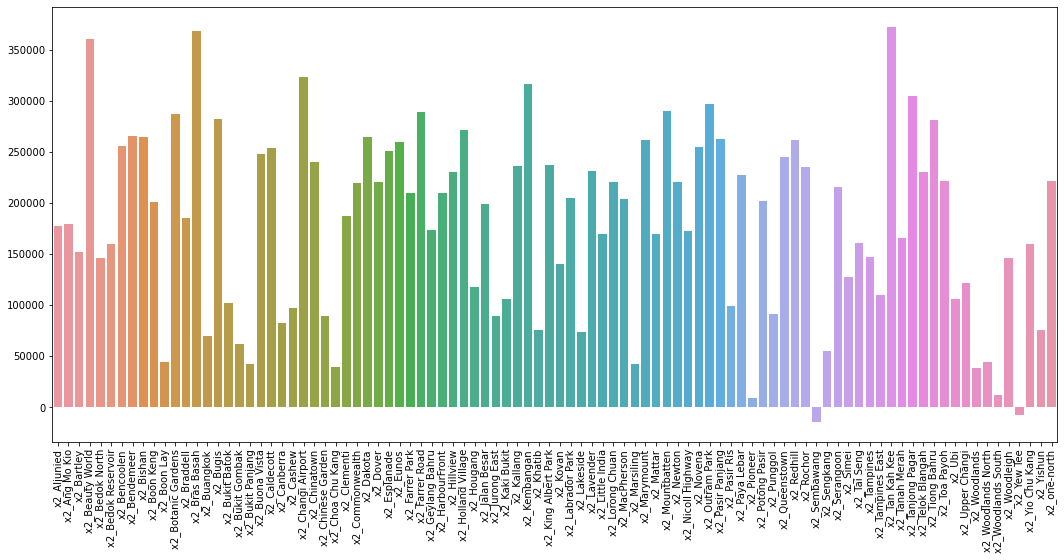

In [51]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df_station_name)

In [ ]:
# Observations:
# Order of significance for numerical features - floor area > remaining lease > distance to MRT > unit level > building height.
# The categorical features act as a additive or subtractive constant multiplied by the logic state, i.e.
# With all things being equal, an HDB near Aljunied station comes at about $177k premium as compared to one near Admiralty Stn.

In [52]:
# Cross-Validated scores of training set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, max_error

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'max_error', 'neg_root_mean_squared_error']
regr = LinearRegression()
scores = cross_validate(estimator = regr, X=X_train, y=y_train, cv=10, scoring = scoring)

R2 = scores["test_r2"].mean()
n, p = X_train.shape
adj_R2 = 1 - ((1-R2) * (n-1)/(n-p-1))
print(("Adjusted R2: %.4f") % adj_R2)

for i in scoring:
    score = abs(scores[f"test_{i}"].mean())
    print((f"{i}: %.4f") % score)           

Adjusted R2: 0.8528
r2: 0.8531
neg_mean_absolute_percentage_error: 0.1082
neg_mean_absolute_error: 49962.5915
max_error: 357503.0711
neg_root_mean_squared_error: 63308.3393


In [53]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = regr.predict(X_test)

# Having a feel for the predicted values
np.set_printoptions(precision=0)
list(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[array([406608., 505000.]),
 array([702645., 820000.]),
 array([503319., 525000.]),
 array([597553., 550000.]),
 array([394860., 440000.]),
 array([546282., 470000.]),
 array([586060., 520000.]),
 array([483055., 465000.]),
 array([316829., 280000.]),
 array([370922., 307000.]),
 array([652714., 720000.]),
 array([358667., 395000.]),
 array([701736., 665000.]),
 array([644428., 560000.]),
 array([403256., 440000.]),
 array([511887., 430000.]),
 array([450104., 480000.]),
 array([449832., 468000.]),
 array([608766., 570000.]),
 array([316751., 330000.]),
 array([371015., 380000.]),
 array([502517., 495000.]),
 array([538005., 525000.]),
 array([482176., 476800.]),
 array([540245., 630000.]),
 array([364187., 271000.]),
 array([ 898828., 1165000.]),
 array([312160., 310000.]),
 array([496938., 495000.]),
 array([273089., 261000.]),
 array([461434., 378000.]),
 array([655428., 730000.]),
 array([426834., 441000.]),
 array([246288., 315000.]),
 array([338342., 365000.]),
 array([ 930335., 

In [ ]:
# Next step: Check out how the popular XGBoost ML algorithm fares.

---

# XGBoost

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X = dataset2.drop("travel_time", axis = 1).loc[:, "flat_type":"remaining_lease"].values
y = dataset2.loc[:, "resale_price"].values

# OHE - With gradient boosting, dummy variable trap is not an issue.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1,2])], remainder='passthrough')
X = ct.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, max_error, mean_squared_error

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'max_error', 'neg_root_mean_squared_error']
XGBregr = XGBRegressor()
scores = cross_validate(estimator = XGBregr, X=X_train, y=y_train, cv=10, scoring = scoring)

R2 = scores["test_r2"].mean()
n, p = X_train.shape
adj_R2 = 1 - ((1-R2) * (n-1)/(n-p-1))
print(("Adjusted R2: %.4f") % adj_R2)

for i in scoring:
    score = abs(scores[f"test_{i}"].mean())
    print((f"{i}: %.4f") % score)           

Adjusted R2: 0.9274
r2: 0.9276
neg_mean_absolute_percentage_error: 0.0727
neg_mean_absolute_error: 34115.7032
max_error: 302940.8625
neg_root_mean_squared_error: 44448.6052


In [ ]:
# Observations:
# XGBoost model has better accuracy.

In [58]:
XGBregr = XGBRegressor()
XGBregr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [59]:
y_pred = XGBregr.predict(X_test)

# Test set scores
R2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_R2 = 1 - ((1-R2) * (n-1)/(n-p-1))
print(("Adjusted R2: %.4f") % adj_R2)
print(("R2: %.4f" % R2))

print("MAPE:", "{:.4f}".format(mean_absolute_percentage_error(y_test, y_pred)))
print("MAE:", "{:.0f}".format(mean_absolute_error(y_test, y_pred)))
print("Max Error:", "{:.0f}".format(max_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(mean_squared_error(y_test, y_pred) ** (1/2)))

Adjusted R2: 0.9314
R2: 0.9320
MAPE: 0.0726
MAE: 33789
Max Error: 301771
RMSE:  43801


In [ ]:
# Next step: Improve the model by tuning its hyperparameters.

### XGBoost - Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

X = dataset2.drop("travel_time", axis = 1).loc[:, "flat_type":"remaining_lease"].values
y = dataset2.loc[:, "resale_price"].values

# OHE
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1,2])], remainder='passthrough')
X = ct.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# First tune
params = {'max_depth': [4, 6, 8, 10, 12, 14, 16],
          'min_child_weight' : [1, 3, 5, 7, 9]             
}

XGBregr = XGBRegressor()

clf = GridSearchCV(cv = 10,
                   estimator=XGBregr, 
                   param_grid=params,
                   scoring=['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'max_error', 'neg_root_mean_squared_error'],
                   refit = 'neg_root_mean_squared_error',
                   verbose=1)

clf.fit(X_train, y_train)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16

In [61]:
print("Best parameters:", clf.best_params_)
cv_results = pd.DataFrame.from_dict(clf.cv_results_)
cv_results

Best parameters: {'max_depth': 16, 'min_child_weight': 3}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,split5_test_neg_mean_absolute_percentage_error,split6_test_neg_mean_absolute_percentage_error,split7_test_neg_mean_absolute_percentage_error,split8_test_neg_mean_absolute_percentage_error,split9_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_max_error,split1_test_max_error,split2_test_max_error,split3_test_max_error,split4_test_max_error,split5_test_max_error,split6_test_max_error,split7_test_max_error,split8_test_max_error,split9_test_max_error,mean_test_max_error,std_test_max_error,rank_test_max_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,split5_test_neg_root_mean_squared_error,split6_test_neg_root_mean_squared_error,split7_test_neg_root_mean_squared_error,split8_test_neg_root_mean_squared_error,split9_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,1.424793,0.017430,0.021219,0.000400,4,1,"{'max_depth': 4, 'min_child_weight': 1}",0.906699,0.902723,0.904001,0.901769,0.904149,0.910499,0.906320,0.907881,0.904503,0.902776,0.905132,0.002560,33,-0.082787,-0.084691,-0.084605,-0.083777,-0.083578,-0.083538,-0.083329,-0.082556,-0.084743,-0.085520,-0.083913,0.000899,35,-39006.606738,-39492.438412,-39752.072629,-39311.815972,-39687.967262,-39341.423524,-39427.683039,-38987.742181,-39584.697021,-40108.291936,-39470.073871,322.304339,35,-297184.8125,-321376.2500,-308930.7500,-371149.7500,-361913.6250,-289721.37500,-323718.6875,-294090.5625,-277248.1250,-309631.56250,-315496.550000,28900.421172,34,-50416.721432,-51192.737950,-50613.231054,-51066.289543,-51855.079713,-50231.903464,-51207.221285,-50301.755231,-50530.267303,-51363.288997,-50877.849597,508.565319,33
1,1.521434,0.075624,0.022721,0.002102,4,3,"{'max_depth': 4, 'min_child_weight': 3}",0.907385,0.900576,0.904986,0.901475,0.904739,0.910910,0.905716,0.906908,0.905212,0.903939,0.905184,0.002787,32,-0.082234,-0.085271,-0.084079,-0.083936,-0.083443,-0.083233,-0.083877,-0.082842,-0.084108,-0.084675,-0.083770,0.000833,33,-38763.607674,-39831.584621,-39440.619153,-39359.935493,-39653.839429,-39224.114286,-39707.615583,-39049.714983,-39260.100953,-39767.477358,-39405.860953,325.803711,33,-303544.7500,-360828.5625,-285937.9375,-373344.0625,-372890.9375,-329781.43750,-293749.6875,-283456.1875,-286529.5000,-323934.18750,-321399.725000,34608.346829,35,-50231.093920,-51754.516103,-50352.787862,-51142.689964,-51695.228923,-50116.350439,-51372.081268,-50566.890497,-50342.364779,-51055.077466,-50862.908122,586.305294,32
2,1.578999,0.091759,0.022220,0.000981,4,5,"{'max_depth': 4, 'min_child_weight': 5}",0.905421,0.903487,0.903918,0.901470,0.905070,0.911978,0.905966,0.907581,0.904720,0.903169,0.905278,0.002739,31,-0.083190,-0.084043,-0.

In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, max_error, mean_squared_error


# Second tune

params = {'max_depth': [16],
          'min_child_weight' : [3],
          'learning_rate': [0.1, 0.2, 0.3],
          'n_estimators': [100, 500, 1000, 1500, 2000]
}

XGBregr = XGBRegressor(tree_method='gpu_hist')  #Using GPU for computation

clf = GridSearchCV(cv = 10,
                   estimator=XGBregr, 
                   param_grid=params,
                   scoring=['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'max_error', 'neg_root_mean_squared_error'],
                   refit = 'neg_root_mean_squared_error',
                   verbose=1)

clf.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [16],
                         'min_child_weight': [3],
               

In [63]:
print("Best parameters:", clf.best_params_)
cv_results = pd.DataFrame.from_dict(clf.cv_results_)
cv_results

Best parameters: {'learning_rate': 0.1, 'max_depth': 16, 'min_child_weight': 3, 'n_estimators': 500}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,split5_test_neg_mean_absolute_percentage_error,split6_test_neg_mean_absolute_percentage_error,split7_test_neg_mean_absolute_percentage_error,split8_test_neg_mean_absolute_percentage_error,split9_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_max_error,split1_test_max_error,split2_test_max_error,split3_test_max_error,split4_test_max_error,split5_test_max_error,split6_test_max_error,split7_test_max_error,split8_test_max_error,split9_test_max_error,mean_test_max_error,std_test_max_error,rank_test_max_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,split5_test_neg_root_mean_squared_error,split6_test_neg_root_mean_squared_error,split7_test_neg_root_mean_squared_error,split8_test_neg_root_mean_squared_error,split9_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,3.293642,0.112351,0.045241,0.057066,0.1,16,3,100,"{'learning_rate': 0.1, 'max_depth': 16, 'min_c...",0.948078,0.947419,0.947545,0.943612,0.947724,0.949284,0.946730,0.948715,0.947183,0.948325,0.947462,0.001467,15,-0.059211,-0.059904,-0.059478,-0.060189,-0.058288,-0.059867,-0.059778,-0.058171,-0.060038,-0.059074,-0.059400,0.000674,15,-27902.968072,-27829.756935,-28023.218464,-28267.560216,-27792.459880,-28242.214133,-28247.619640,-27516.372415,-28147.646221,-27806.335862,-27977.615184,237.017211,15,-249124.8125,-309322.8125,-253150.5625,-392243.6875,-278359.5000,-227099.62500,-360948.1250,-276517.6250,-259763.3125,-262509.50000,-286903.956250,49736.610256,8,-37610.360728,-37637.275106,-37413.129708,-38690.417146,-38295.013860,-37812.742196,-38614.436855,-37532.136993,-37578.789188,-37445.931871,-37863.023365,460.411973,15
1,11.534368,0.186315,0.049044,0.008703,0.1,16,3,500,"{'learning_rate': 0.1, 'max_depth': 16, 'min_c...",0.957679,0.958227,0.958403,0.954182,0.957475,0.958912,0.956941,0.957629,0.958394,0.958680,0.957652,0.001291,1,-0.050972,-0.051430,-0.051381,-0.052181,-0.050644,-0.051708,-0.051642,-0.050175,-0.051241,-0.050632,-0.051201,0.000569,1,-24285.048406,-24064.197961,-24376.373799,-24692.272848,-24314.436763,-24580.549888,-24572.572289,-24007.781998,-24219.906961,-24096.587663,-24320.972858,223.054620,1,-260514.5000,-304687.5625,-216878.3125,-392813.8750,-272838.7500,-213038.09375,-335561.0000,-284234.3750,-265386.8125,-256869.75000,-280282.303125,51076.775627,4,-33955.549218,-33546.687396,-33316.579428,-34876.130961,-34539.344101,-34034.919076,-34716.938724,-34115.024455,-33353.115276,-33484.645496,-33993.893413,542.693071,1
2,20.592811,0.902546,0.133021,0.192968,0.1,16,3,1000,"{'learning_rate': 0.1, 'max_depth': 16, 'min_c...",0.957140,0.957934,0.958168,0.953789,0.957

In [64]:
# Fit with best params
XGBregr = XGBRegressor(**clf.best_params_)
XGBregr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=16, max_leaves=0, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [65]:
y_pred = XGBregr.predict(X_test)

# Having a feel for the numbers
np.set_printoptions(precision=0)
list(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[array([518087., 505000.]),
 array([782638., 820000.]),
 array([548672., 525000.]),
 array([574582., 550000.]),
 array([436342., 440000.]),
 array([436564., 470000.]),
 array([553901., 520000.]),
 array([479597., 465000.]),
 array([288300., 280000.]),
 array([309995., 307000.]),
 array([673095., 720000.]),
 array([403725., 395000.]),
 array([710187., 665000.]),
 array([537112., 560000.]),
 array([437242., 440000.]),
 array([422778., 430000.]),
 array([466556., 480000.]),
 array([482027., 468000.]),
 array([595898., 570000.]),
 array([357157., 330000.]),
 array([363741., 380000.]),
 array([490191., 495000.]),
 array([515045., 525000.]),
 array([506506., 476800.]),
 array([588646., 630000.]),
 array([292730., 271000.]),
 array([1025685., 1165000.]),
 array([285373., 310000.]),
 array([523506., 495000.]),
 array([293929., 261000.]),
 array([375769., 378000.]),
 array([739776., 730000.]),
 array([445160., 441000.]),
 array([368643., 315000.]),
 array([355896., 365000.]),
 array([ 985446., 

In [66]:
# Test set scores
R2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_R2 = 1 - ((1-R2) * (n-1)/(n-p-1))
print(("Adjusted R2: %.4f") % adj_R2)
print(("R2: %.4f" % R2))

print("MAPE:", "{:.4f}".format(mean_absolute_percentage_error(y_test, y_pred)))
print("MAE:", "{:.0f}".format(mean_absolute_error(y_test, y_pred)))
print("Max Error:", "{:.0f}".format(max_error(y_test, y_pred)))
print("RMSE: ", "{:.0f}".format(mean_squared_error(y_test, y_pred) ** (1/2)))

Adjusted R2: 0.9616
R2: 0.9619
MAPE: 0.0495
MAE: 23445
Max Error: 275391
RMSE:  32769


In [ ]:
# Pre-tuned:

# Adjusted R2: 0.9314
# R2: 0.9320
# MAPE: 0.0726
# MAE: 33789
# Max Error: 301771
# RMSE:  43801

# Tuned XGBoost model performs markedly better.

In [67]:
XGBregr.save_model('XGBmodel.json')